In [2]:
import pandas as pd
import numpy as np

In [ ]:
print(dir(all_functions))

['Dict', 'List', 'Optional', 'Union', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '__warningregistry__', 'analyze_city_activity', 'check_duplicate_events', 'check_numbering_sequence', 'check_order_relation', 'check_session_start', 'detect_anomalous_device_shares', 'detect_anomalous_page_views', 'detect_anomalous_time_windows', 'detect_anomalous_users', 'detect_location_changes', 'detect_suspicious_ips', 'detect_user_activity_spikes', 'iqr_detector', 'isolation_forest_detector', 'lof_detector', 'majority_anomaly_vote', 'modified_zscore_detector', 'np', 'pd', 'percentile_detector', 'plot_anomalies_comparison', 'plt', 'stats', 'timedelta', 'zscore_detector']


In [3]:
!gdown --id 1GvWVG9iS3sQkYnaERcd_G2hCbpa2xLyC

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1GvWVG9iS3sQkYnaERcd_G2hCbpa2xLyC
From (redirected): https://drive.google.com/uc?id=1GvWVG9iS3sQkYnaERcd_G2hCbpa2xLyC&confirm=t&uuid=f37ef696-9a60-4175-8c3c-257ebd10fe99
To: /content/data_2024-10-09_part2.parquet
100% 540M/540M [00:06<00:00, 79.4MB/s]


In [4]:
df = pd.read_parquet('data_2024-10-09_part2.parquet')


In [ ]:
df = df.head(100_000)

In [ ]:
data = {
    'ts': [
        '2024-04-10 10:00:00', '2024-04-10 10:00:00',
        '2024-04-10 10:05:00', '2024-04-10 10:10:00',
        '2024-04-10 10:15:00', '2024-04-10 10:20:00'
    ],
    'ip': [
        '192.168.0.1', '192.168.0.1',
        '10.0.0.1', '10.0.0.1',
        '8.8.8.8', '123.45.67.89'
    ],
    'page_view_order_number': [1, 1, 2, 3, 4, 5],
    'event_order_number': [1, 1, 2, 3, 4, 5],
    'event': ['page_view', 'page_view', 'click', 'scroll', 'click', 'logout'],
    'secs': [5, 5, 3, 10, 4, 2],
    'url': [
        '/home', '/home', '/article/1', '/article/1', '/article/2', '/logout'
    ],
    'referer': [
        '', '', '/home', '/article/1', '/home', '/article/2'
    ],
    'randPAS_user_passport_id': [1001, 1001, 1002, 1002, 1003, 1003],
    'randPAS_user_agent_id': [2001, 2001, 2002, 2002, 2003, 2003],
    'randPAS_trex_cid': [3001, 3001, 3002, 3002, 3003, 3003],
    'randPAS_uma_media_cid': [4001, 4001, 4002, 4002, 4003, 4003],
    'randPAS_session_id': ['sess1', 'sess1', 'sess2', 'sess2', 'sess3', 'sess3'],
    'is_new_page': [1, 1, 0, 1, 1, 0],
    'title': ['Home', 'Home', 'Article 1', 'Article 1', 'Article 2', 'Logout'],
    'node_id': [101, 101, 102, 102, 103, 104],
    'main_rubric_id': [201, 201, 202, 202, 203, 204],
    'content_is_longread': [0, 0, 1, 1, 0, 0],
    'content_editor_id': [301, 301, 302, 302, 303, 304],
    'content_author_ids': [[401], [401], [402], [402], [403], [404]],
    'is_registration': [0, 0, 0, 0, 0, 1],
    'is_fast_login': [1, 1, 1, 1, 0, 0],
    'ua_device_family': ['iPhone', 'iPhone', 'Android', 'Android', 'PC', 'PC'],
    'ua_device_brand': ['Apple', 'Apple', 'Samsung', 'Samsung', 'Dell', 'Dell'],
    'ua_device_model': ['X', 'X', 'S10', 'S10', 'XPS', 'XPS'],
    'ua_os_family': ['iOS', 'iOS', 'Android', 'Android', 'Windows', 'Windows'],
    'ua_os_version': ['14.4', '14.4', '10', '10', '10', '10'],
    'ua_browser_family': ['Safari', 'Safari', 'Chrome', 'Chrome', 'Edge', 'Edge'],
    'ua_browser_version': ['14', '14', '89', '89', '90', '90'],
    'ua_is_mobile': [1, 1, 1, 1, 0, 0],
    'ua_is_tablet': [0, 0, 0, 0, 0, 0],
    'ua_is_pc': [0, 0, 0, 0, 1, 1],
    'ua_is_bot': [0, 0, 0, 0, 0, 0],
    'ua_device_type': ['mobile', 'mobile', 'mobile', 'mobile', 'pc', 'pc'],
    'geo_city_id': [1, 1, 2, 2, 3, 4],
    'date': ['2024-04-10'] * 6
}

df = pd.DataFrame(data)
df['ts'] = pd.to_datetime(df['ts'])


In [ ]:
print("Проверка дубликатов событий:")
print(check_duplicate_events(df))
print("\nПроверка начала сессий:")
print(check_session_start(df))


Проверка дубликатов событий:
{'duplicates': [{'message': 'Дубликат события: ts=2024-04-10 10:00:00, event=page_view.', 'session_id': 'sess1', 'ip': '192.168.0.1'}, {'message': 'Дубликат события: ts=2024-04-10 10:00:00, event=page_view.', 'session_id': 'sess1', 'ip': '192.168.0.1'}]}

Проверка начала сессий:
{'start_errors': [{'message': 'Сессия sess2 не начинается с 1.', 'first_page_view': 2, 'first_event': 2, 'ip': '10.0.0.1'}, {'message': 'Сессия sess3 не начинается с 1.', 'first_page_view': 4, 'first_event': 4, 'ip': '8.8.8.8'}]}


In [ ]:
print("\nПроверка соотношения order numbers:")
print(check_order_relation(df))

print("\nПроверка последовательности нумерации:")
print(check_numbering_sequence(df))


Проверка соотношения order numbers:
{'relation_errors': [], 'message': 'Все номера событий соответствуют номерам просмотров страниц.'}

Проверка последовательности нумерации:
{'missing_numbers': [{'session_id': 'sess1', 'message': 'Номер события 1 не соответствует 2 в сессии sess1.', 'ip': '192.168.0.1', 'previous_event_ts': Timestamp('2024-04-10 10:00:00'), 'current_event_ts': Timestamp('2024-04-10 10:00:00'), 'previous_event': 'page_view', 'current_event': 'page_view'}]}


In [ ]:
print(all_functions.analyze_city_activity(df))
print(all_functions.detect_location_changes(df))

(Empty DataFrame
Columns: [geo_city_id, ts, event_count, z_score, is_anomaly, total_events, activity_ratio, prev_ratio, ratio_change]
Index: [], Empty DataFrame
Columns: [geo_city_id, ts, event_count, z_score, is_anomaly, total_events, activity_ratio, prev_ratio, ratio_change]
Index: [])
   user_id           city_changes  change_count        first_change  \
0     1003  3 (nans) → 4 (300.0s)             1 2024-04-10 10:20:00   

          last_change  unique_cities  unique_ips  
0 2024-04-10 10:20:00              2           2  


/content/all_functions.py:150: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  
/content/all_functions.py:163: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  DataFrame с результатами анализа


In [ ]:
print(all_functions.detect_suspicious_ips(df))

Empty DataFrame
Columns: [ip, unique_users, total_actions, first_seen, last_seen, activity_period]
Index: []


In [ ]:
print(all_functions.detect_user_activity_spikes(df))

Empty DataFrame
Columns: [randPAS_user_passport_id, rapid_actions_count, min_time_diff, avg_time_diff, ip_list, ip_count]
Index: []


In [ ]:
print(all_functions.detect_anomalous_time_windows(df))

TypeError: detect_anomalous_time_windows() missing 2 required positional arguments: 'time_col' and 'user_col'

In [ ]:
def detect_location_changes(df: pd.DataFrame) -> pd.DataFrame:
    """
    Анализирует смену местоположения (geo_city_id и ip) для каждого пользователя,
    учитывая только реальные изменения значений.
    """
    df_sorted = df.sort_values(['randPAS_user_passport_id', 'ts'])
    grouped = df_sorted.groupby('randPAS_user_passport_id')

    results = []

    for user_id, group in grouped:
        user_data = group[['ts', 'geo_city_id', 'ip']].drop_duplicates()
        user_data = user_data.sort_values('ts')

        prev_city = user_data['geo_city_id'].shift()
        prev_ip = user_data['ip'].shift()

        city_changed = (user_data['geo_city_id'] != prev_city) & ~(user_data['geo_city_id'].isna() & prev_city.isna())
        ip_changed = (user_data['ip'] != prev_ip) & ~(user_data['ip'].isna() & prev_ip.isna())

        changes = user_data[city_changed | ip_changed].copy()

        if len(changes) > 1:
            changes['time_diff'] = changes['ts'].diff().dt.total_seconds()

            city_ip_changes = list(zip(
                changes['geo_city_id'].astype(str),
                changes['ip'].astype(str),
                changes['time_diff'].astype(str)
            ))

            results.append({
                'user_id': user_id,
                'city_changes': " → ".join([f"{city}|{ip} ({time}s)" for city, ip, time in city_ip_changes]),
                'change_count': len(changes) - 1,
                'first_change': changes['ts'].iloc[1],
                'last_change': changes['ts'].iloc[-1],
                'unique_cities': changes['geo_city_id'].nunique(),
                'unique_ips': changes['ip'].nunique()
            })

    return pd.DataFrame(results)




location_changes_df = detect_location_changes(df)
print(location_changes_df)

                             user_id  \
0                                      
1      &M#G{Y/4V.^e)@{RPVuhPb~O!Q%}s   
2      (.p=Lxbsr~F,NHHeA^z4a'%TE*^Uz   
3      ,~[. `e,4[G;}lt+Y@tG.`W|3Q]DT   
4      1Y.<;?P\_3}g9FDK#:6!O0;&>c3ni   
...                              ...   
1748  ~k`W XZC'n~>ZT|HrJC!_":YXN/-3|   
1749  ~qqh#eI6vgdfBl~P3hyBr`<"yw4i3U   
1750  ~v\Sq$ZQ-&.<s,+vGdF(^$IvOaZZ'y   
1751  ~z3/1[zjLZmr..C*Vy@csx|?yKZ&E"   
1752  ~{R]G\]uDuXGg5'5iLiGhT{*B<k>mI   

                                           city_changes  change_count  \
0     nan|77.222.118.4 (nans) → nan|188.120.255.250 ...       3588423   
1     548442.0|94.243.247.145 (nans) → nan|94.243.24...             3   
2     498817.0|188.170.84.123 (nans) → nan|188.170.8...             1   
3     nan|176.59.46.104 (nans) → 524901.0|5.228.117....             6   
4     554840.0|46.147.185.184 (nans) → nan|46.147.18...             1   
...                                                 ...           ...   
1748  47

In [ ]:
import matplotlib.pyplot as plt

def plot_location_change_distribution(location_changes_df, threshold=45):
    """
    Строит график распределения числа изменений местоположения с логарифмической шкалой по оси Y.

    :param location_changes_df: DataFrame, содержащий столбец 'change_count' — количество изменений местоположения.
    :param threshold: int, значения больше или равные которому будут объединены в одну категорию "threshold+".
    """

    change_count_dist = location_changes_df['change_count'].value_counts().sort_index()

    above_threshold = change_count_dist[change_count_dist.index >= threshold].sum()
    change_count_dist = change_count_dist[change_count_dist.index < threshold]

    change_count_dist[threshold] = above_threshold

    plt.figure(figsize=(10, 6))
    plt.bar(change_count_dist.index, change_count_dist.values, color='skyblue')
    plt.yscale('log')
    xticks = [i for i in range(1, threshold, 5)] + [threshold]
    plt.xticks(xticks, [str(i) if i < threshold else f'{threshold}+' for i in xticks])

    plt.xlabel('Число изменений местоположения (город/IP)')
    plt.ylabel('Количество пользователей (логарифмическая шкала)')
    plt.title('Распределение числа изменений местоположения среди пользователей')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()


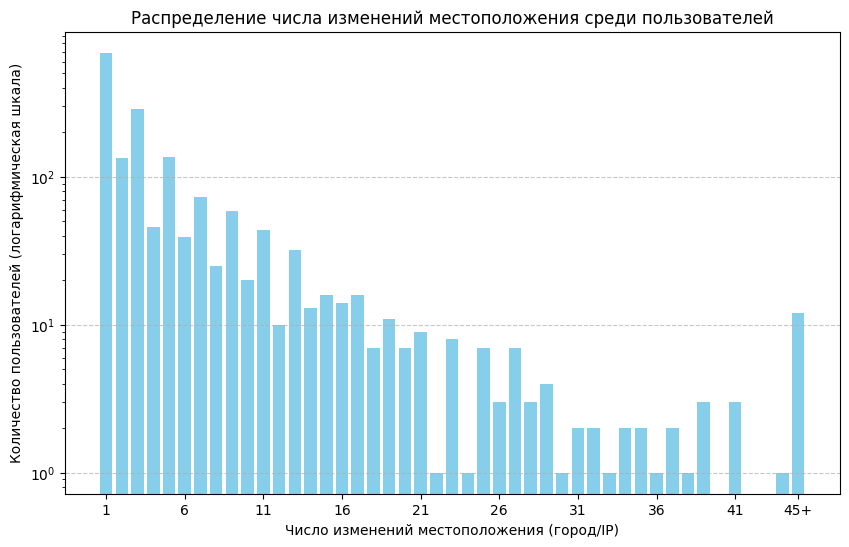

In [ ]:
plot_location_change_distribution(location_changes_df)

In [ ]:
def analyze_city_activity(df, min_events=10, z_threshold=3, rolling_window='1H'):
    """
    Анализирует активность по городам и выявляет аномальные всплески

    Параметры:
        df: DataFrame с данными
        min_events: минимальное количество событий для анализа города
        z_threshold: порог для детектирования аномалий (в стандартных отклонениях)
        rolling_window: размер окна для скользящей статистики

    Возвращает:
        DataFrame с результатами анализа
    """

    if not pd.api.types.is_datetime64_any_dtype(df['ts']):
        df['ts'] = pd.to_datetime(df['ts'])
    city_activity = df.groupby(['geo_city_id', pd.Grouper(key='ts', freq=rolling_window)]) \
        .size() \
        .reset_index(name='event_count')

    city_stats = city_activity.groupby('geo_city_id')['event_count'].agg(['count', 'mean', 'std'])
    valid_cities = city_stats[city_stats['count'] > 5].index
    city_activity = city_activity[city_activity['geo_city_id'].isin(valid_cities)]

    city_activity['z_score'] = city_activity.groupby('geo_city_id')['event_count'] \
        .transform(lambda x: (x - x.mean()) / x.std())

    city_activity['is_anomaly'] = city_activity['z_score'] > z_threshold

    total_activity = df.groupby(pd.Grouper(key='ts', freq=rolling_window)) \
        .size() \
        .reset_index(name='total_events')

    city_activity = city_activity.merge(total_activity, on='ts')
    city_activity['activity_ratio'] = city_activity['event_count'] / city_activity['total_events']

    city_activity['prev_ratio'] = city_activity.groupby('geo_city_id')['activity_ratio'].shift(1)
    city_activity['ratio_change'] = (city_activity['activity_ratio'] - city_activity['prev_ratio']) / city_activity[
        'prev_ratio']

    anomalies = city_activity[city_activity['is_anomaly']].sort_values('z_score', ascending=False)

    return anomalies, city_activity


anomalies, city_activity = analyze_city_activity(df)


<ipython-input-10-94bb795617bf>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  city_activity = df.groupby(['geo_city_id', pd.Grouper(key='ts', freq=rolling_window)]) \
<ipython-input-10-94bb795617bf>:30: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  total_activity = df.groupby(pd.Grouper(key='ts', freq=rolling_window)) \


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def plot_top_anomalous_cities(city_activity_df, top_n=5):
    """
    Визуализирует временные ряды активности для топ-N городов с наибольшим числом аномалий.

    :param city_activity_df: DataFrame, полученный из analyze_city_activity
    :param top_n: количество городов для отображения
    """
    sns.set(style="whitegrid")
    top_cities = (
        city_activity_df[city_activity_df['is_anomaly']]
        .groupby('geo_city_id')
        .size()
        .sort_values(ascending=False)
        .head(top_n)
        .index
    )


    num_plots = len(top_cities)
    fig, axes = plt.subplots(num_plots, 1, figsize=(14, num_plots * 4), sharex=True)

    if num_plots == 1:
        axes = [axes]

    for ax, city_id in zip(axes, top_cities):
        city_data = city_activity_df[city_activity_df['geo_city_id'] == city_id]
        anomalies = city_data[city_data['is_anomaly']]

        ax.plot(
            city_data['ts'], city_data['event_count'],
            color='steelblue', linewidth=2, label='Число событий'
        )

        ax.scatter(
            anomalies['ts'], anomalies['event_count'],
            color='crimson', s=60, edgecolors='white', linewidth=1.5,
            label='Аномалия', zorder=5
        )

        ax.set_title(f'Город ID {city_id} — активность и аномалии', fontsize=14, fontweight='bold')
        ax.set_ylabel('События', fontsize=12)
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.6)

        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %H:%M'))
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.xlabel('Время', fontsize=12)
    plt.tight_layout()
    plt.show()


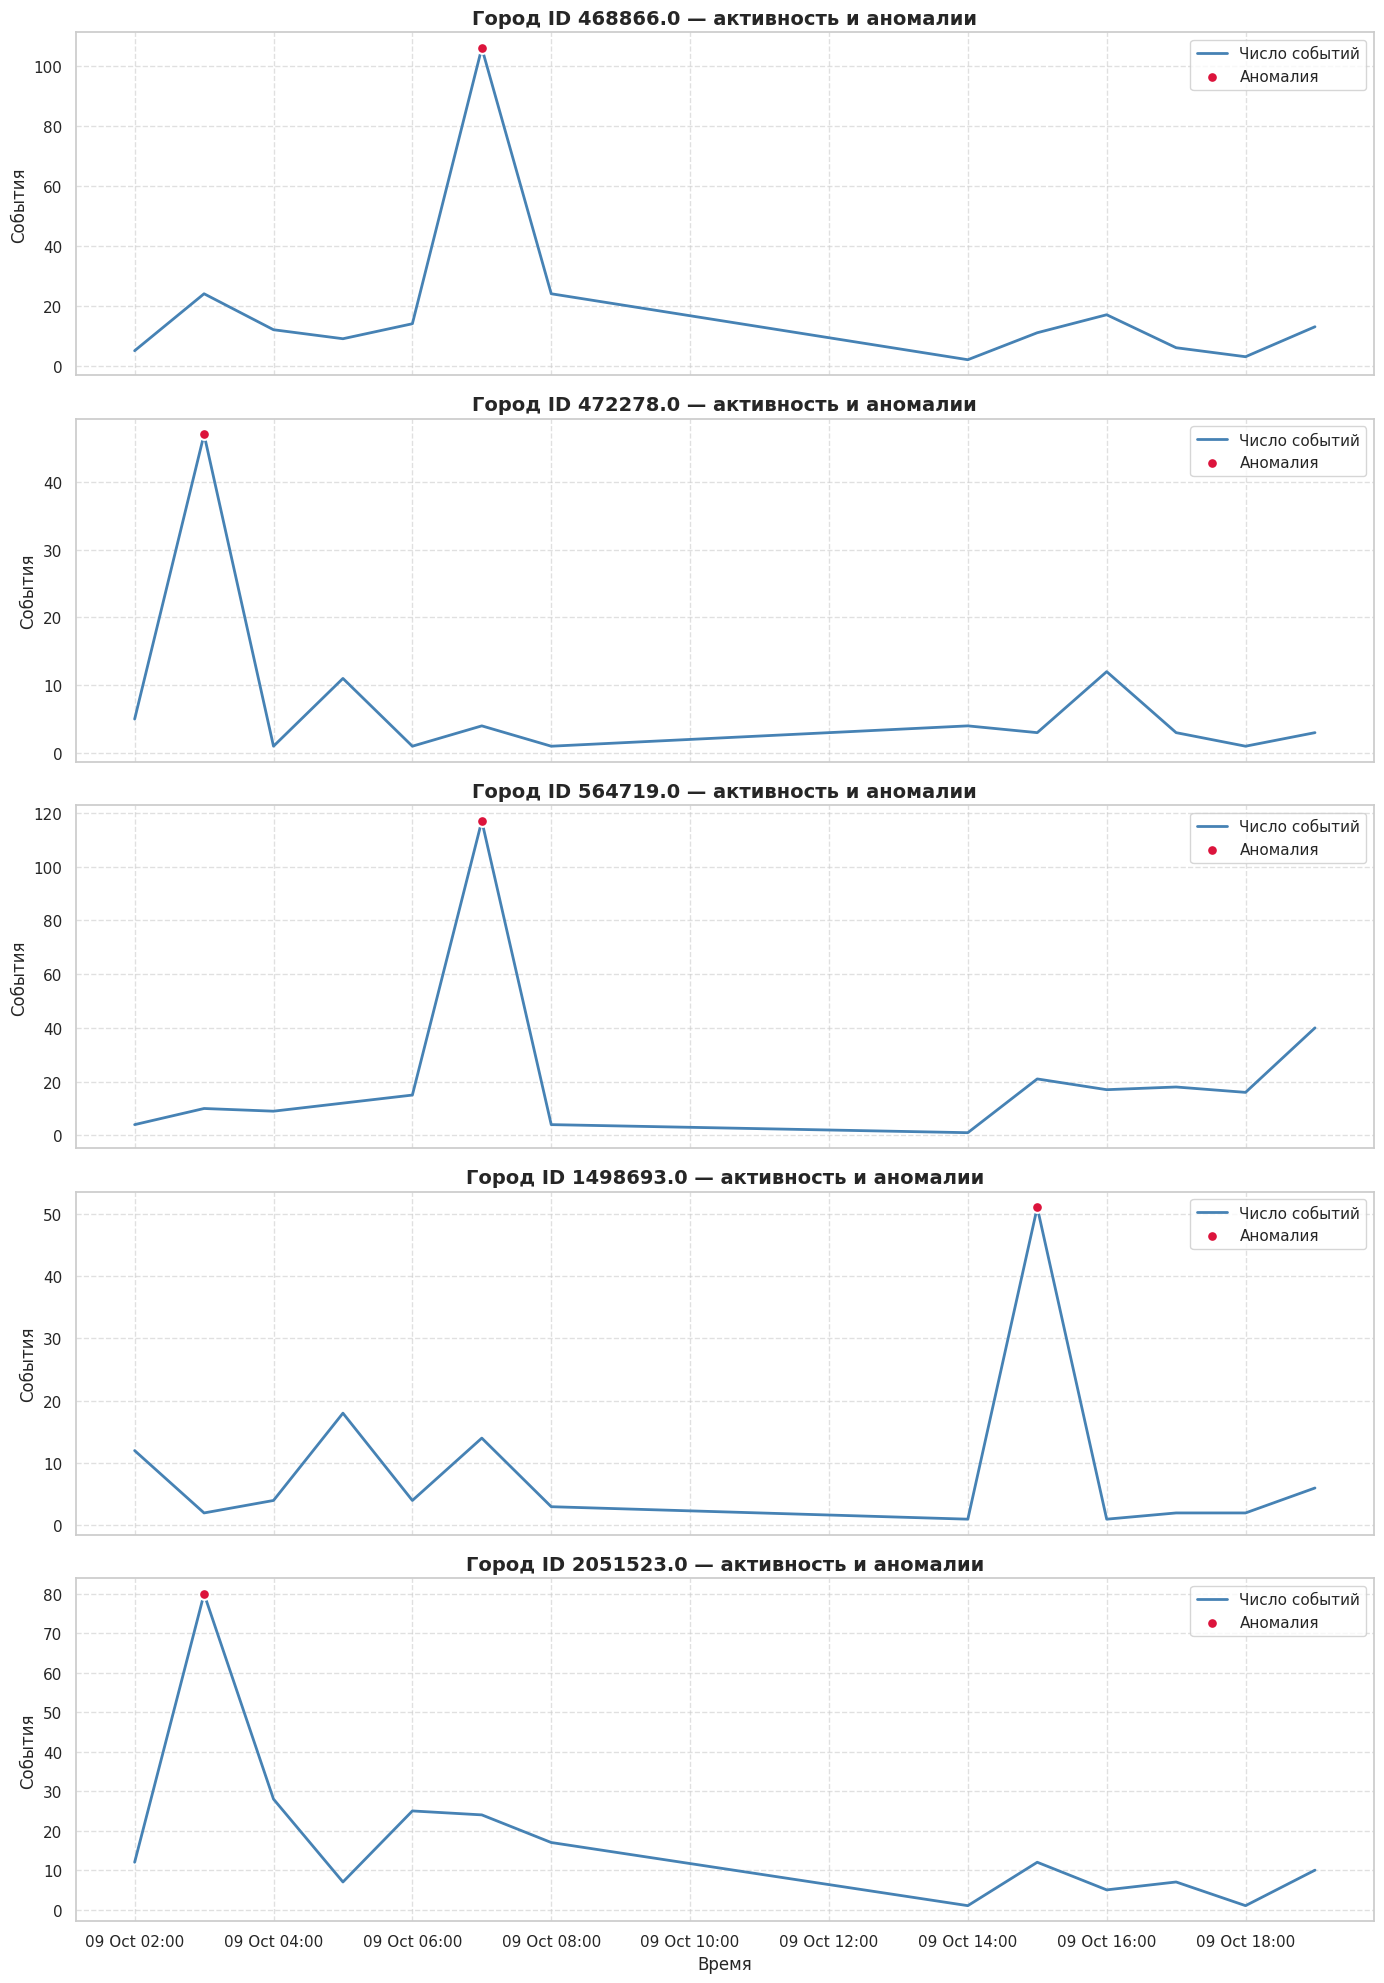

In [ ]:
plot_top_anomalous_cities(city_activity)

In [ ]:
def detect_suspicious_ips(df: pd.DataFrame,
                          max_users_per_ip: int = 2) -> pd.DataFrame:
    """
    Обнаруживает IP-адреса с аномально большим количеством пользователей

    Параметры:
        df: DataFrame с данными
        max_users_per_ip: максимальное допустимое количество пользователей с одного IP

    Возвращает:
        DataFrame с подозрительными IP и статистикой
    """
    ip_stats = (
        df.groupby('ip')
        .agg(
            unique_users=('randPAS_user_passport_id', 'nunique'),
            total_actions=('randPAS_user_passport_id', 'count'),
            first_seen=('ts', 'min'),
            last_seen=('ts', 'max')
        )
        .reset_index()
    )

    suspicious_ips = ip_stats[ip_stats['unique_users'] > max_users_per_ip]
    suspicious_ips['activity_period'] = suspicious_ips['last_seen'] - suspicious_ips['first_seen']

    return suspicious_ips.sort_values('unique_users', ascending=False)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_suspicious_ips(suspicious_ips_df, top_n=10):
    """
    Визуализирует топ-N подозрительных IP-адресов по числу уникальных пользователей.

    :param suspicious_ips_df: DataFrame, полученный из detect_suspicious_ips
    :param top_n: Сколько IP отобразить
    """
    sns.set(style="whitegrid")
    top_ips = suspicious_ips_df.head(top_n).copy()
    top_ips = top_ips.sort_values("unique_users", ascending=True)

    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=top_ips,
        x='ip',
        y='unique_users',
        color='skyblue'
    )

    plt.xlabel('Уникальные пользователи', fontsize=12)
    plt.ylabel('IP-адрес', fontsize=12)
    plt.title(f'Топ-{top_n} подозрительных IP по числу пользователей', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()



def plot_ip_bubble_chart(suspicious_ips_df):
    """
    Строит bubble chart: пользователи vs действия, размер = длительность активности.

    :param suspicious_ips_df: DataFrame, полученный из detect_suspicious_ips
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sizes = suspicious_ips_df['activity_period'].dt.total_seconds() / 60

    plt.scatter(
        suspicious_ips_df['unique_users'],
        suspicious_ips_df['total_actions'],
        s=sizes,
        alpha=0.6,
        color='tomato',
        edgecolors='black'
    )

    for _, row in suspicious_ips_df.iterrows():
        plt.text(row['unique_users'], row['total_actions'], row['ip'], fontsize=8, alpha=0.7)

    plt.xlabel('Уникальные пользователи')
    plt.ylabel('Общее количество действий')
    plt.title('Анализ подозрительных IP: активность и масштаб')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
suspicious_ips_df = detect_suspicious_ips(df)


<ipython-input-18-a6122296bb98>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_ips['activity_period'] = suspicious_ips['last_seen'] - suspicious_ips['first_seen']


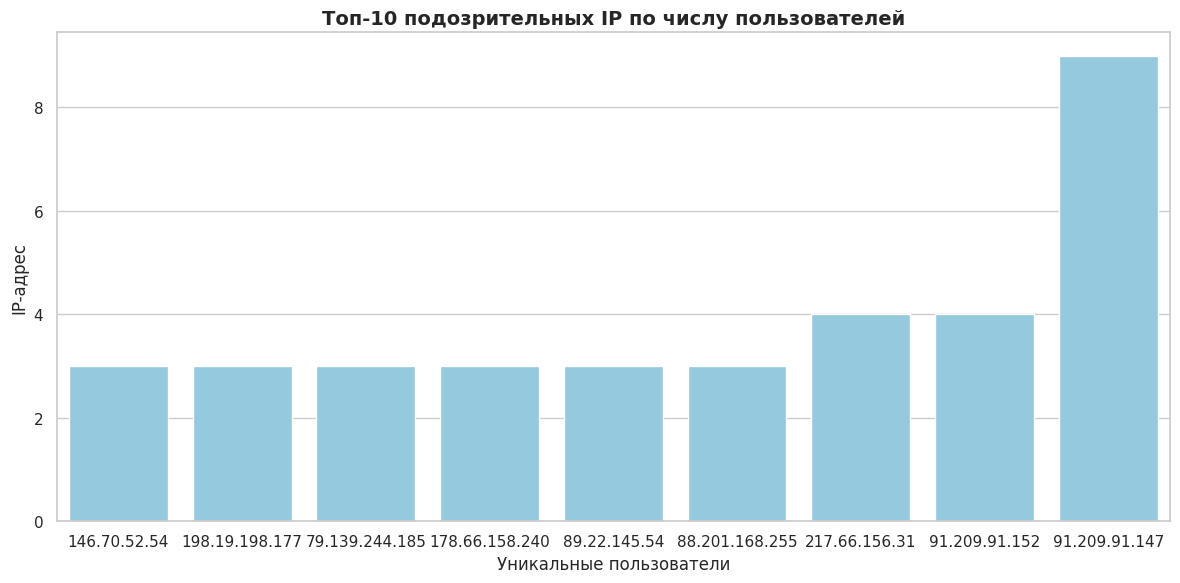

In [ ]:
plot_top_suspicious_ips(suspicious_ips_df)


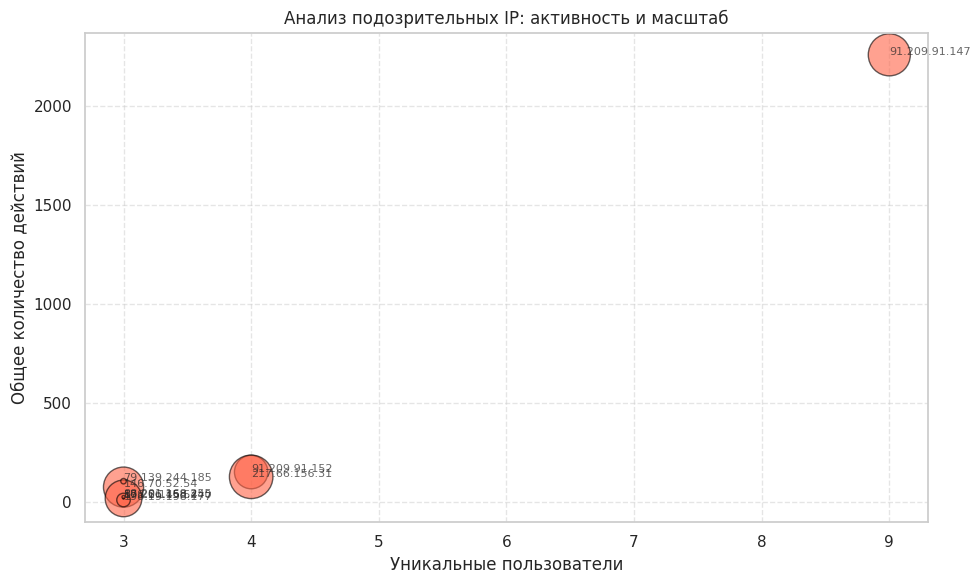

In [ ]:
plot_ip_bubble_chart(suspicious_ips_df)

In [ ]:
def detect_anomalous_time_windows(df, threshold=1.5, window_size='1H'):
    """
        Обнаруживает аномальные временные окна, где активность резко меняется.

        Параметры:
            df (pd.DataFrame): DataFrame с данными о времени активности.
            threshold (float): Порог для изменения пропорции активности по временным окнам.
            window_size (str): Размер временного окна для анализа.

        Возвращает:
            pd.DataFrame: DataFrame с аномальными временными окнами и их статистикой.
        """
    df = df.copy()
    df['ts'] = pd.to_datetime(df['ts'])
    df['time_window'] = df['ts'].dt.floor(window_size)

    df = df.sort_values(by=['randPAS_user_passport_id', 'ts'])
    df['time_diff'] = df.groupby('randPAS_user_passport_id')['ts'].diff().dt.total_seconds()

    df['time_category'] = pd.cut(df['time_diff'],
                                 bins=[0, 30, 300, 1800, float('inf')],
                                 labels=['short', 'medium', 'long', 'very_long'])

    time_window_stats = df.groupby('time_window')['time_category'].value_counts(normalize=True).unstack().fillna(0)

    time_window_stats['short_ratio_change'] = time_window_stats['short'].pct_change().abs().fillna(0)

    anomalous_windows = time_window_stats[time_window_stats['short_ratio_change'] > threshold]

    return anomalous_windows[['short', 'medium', 'long']]


def plot_anomalous_time_windows(anomalous_df, full_stats_df):
    """
    Визуализирует динамику категорий сессий по времени и выделяет аномальные окна.

    :param anomalous_df: DataFrame с аномальными временными окнами (из detect_anomalous_time_windows)
    :param full_stats_df: Полный time_window_stats до фильтрации, чтобы видеть всю картину
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(14, 6))

    plt.stackplot(full_stats_df.index,
                  full_stats_df['short'],
                  full_stats_df['medium'],
                  full_stats_df['long'],
                  labels=['short', 'medium', 'long'],
                  colors=['#7bc8f6', '#aad8b0', '#f7b89c'],
                  alpha=0.8)

    for t in anomalous_df.index:
        plt.axvline(x=t, color='red', linestyle='--', alpha=0.6)

    plt.legend(loc='upper left')
    plt.title('Распределение типов сессий по времени с выделением аномалий', fontsize=14, fontweight='bold')
    plt.xlabel('Временное окно')
    plt.ylabel('Доля сессий')
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()



<ipython-input-44-60f938bad7ca>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['time_window'] = df['ts'].dt.floor(window_size)
<ipython-input-44-60f938bad7ca>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['time_window'] = df['ts'].dt.floor(window_size)


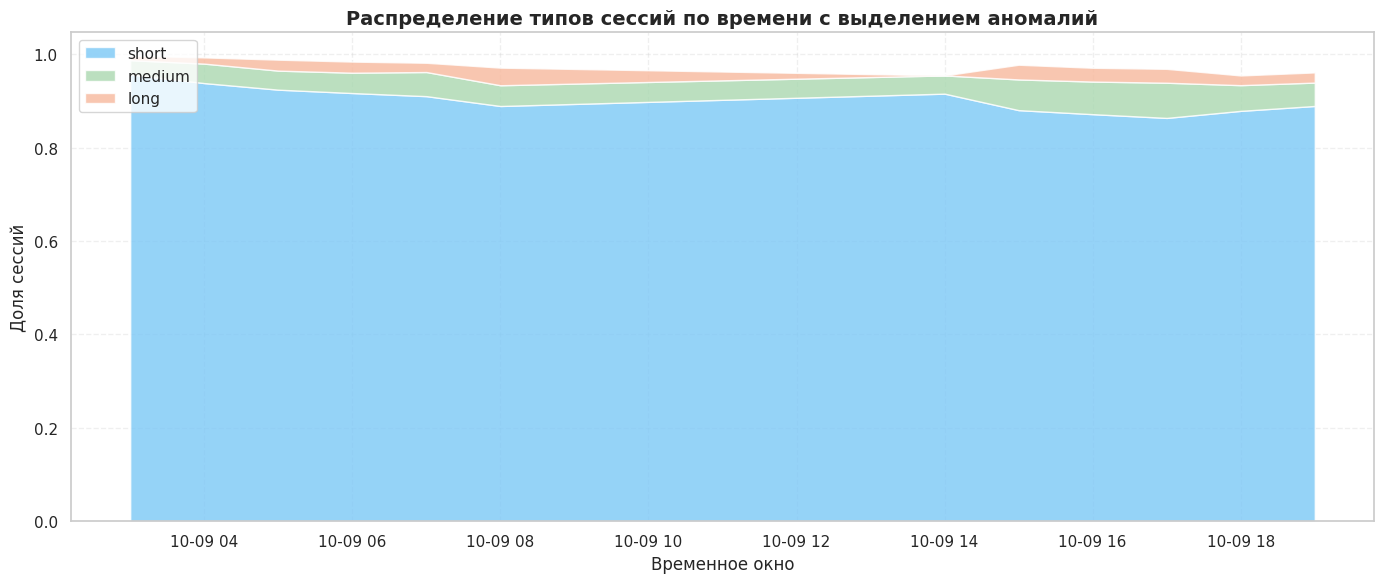

In [ ]:

full_stats = detect_anomalous_time_windows(df, threshold=0, window_size='1H')
anomalies = detect_anomalous_time_windows(df, threshold=1.5, window_size='1H')

plot_anomalous_time_windows(anomalies, full_stats)


In [12]:
def detect_anomalous_page_views(df, threshold=3, window_size='30T'):
    """
    Обнаруживает аномальные изменения в количестве просмотров страниц по временным окнам.

    Параметры:
        df (pd.DataFrame): DataFrame с данными о просмотрах страниц. Должен содержать 'ts', 'url', 'title'.
        threshold (int): Порог для обнаружения аномалий.
        window_size (str): Размер временного окна.

    Возвращает:
        pd.DataFrame: Аномалии с колонками ['time_window', 'url', 'title', 'growth'].
    """
    df = df.copy()
    df['ts'] = pd.to_datetime(df['ts'])
    df['time_window'] = df['ts'].dt.floor(window_size)

    titles = df.groupby(['time_window', 'url'])['title'].last().reset_index()

    page_views = df.groupby(['time_window', 'url'])['randPAS_user_passport_id'].nunique().unstack().fillna(0)
    page_views_change = page_views.pct_change().abs()
    page_views_change[page_views.shift(1) == 0] = np.nan

    anomalies = page_views_change[page_views_change > threshold].stack().reset_index()
    anomalies.columns = ['time_window', 'url', 'growth']

    anomalies = anomalies.merge(titles, on=['time_window', 'url'], how='left')

    return anomalies.dropna(subset=['growth'])


def plot_anomalous_page_views(anomalies_df):
    """
    Визуализирует аномалии по title (результат detect_anomalous_page_views).

    Параметры:
        anomalies_df (pd.DataFrame): DataFrame с колонками ['time_window', 'url', 'title', 'growth'].
    """
    if anomalies_df.empty:
        print("Нет аномалий для отображения.")
        return

    plt.figure(figsize=(14, 6))
    sns.scatterplot(
        data=anomalies_df,
        x='time_window',
        y='title',
        size='growth',
        hue='growth',
        palette='Reds',
        sizes=(50, 300),
        legend='brief'
    )

    plt.title('Обнаруженные аномалии по названиям страниц (title)')
    plt.xlabel('Временное окно')
    plt.ylabel('Заголовок страницы (title)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Рост')
    plt.show()



<ipython-input-12-ad9e51f7bbb4>:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['time_window'] = df['ts'].dt.floor(window_size)


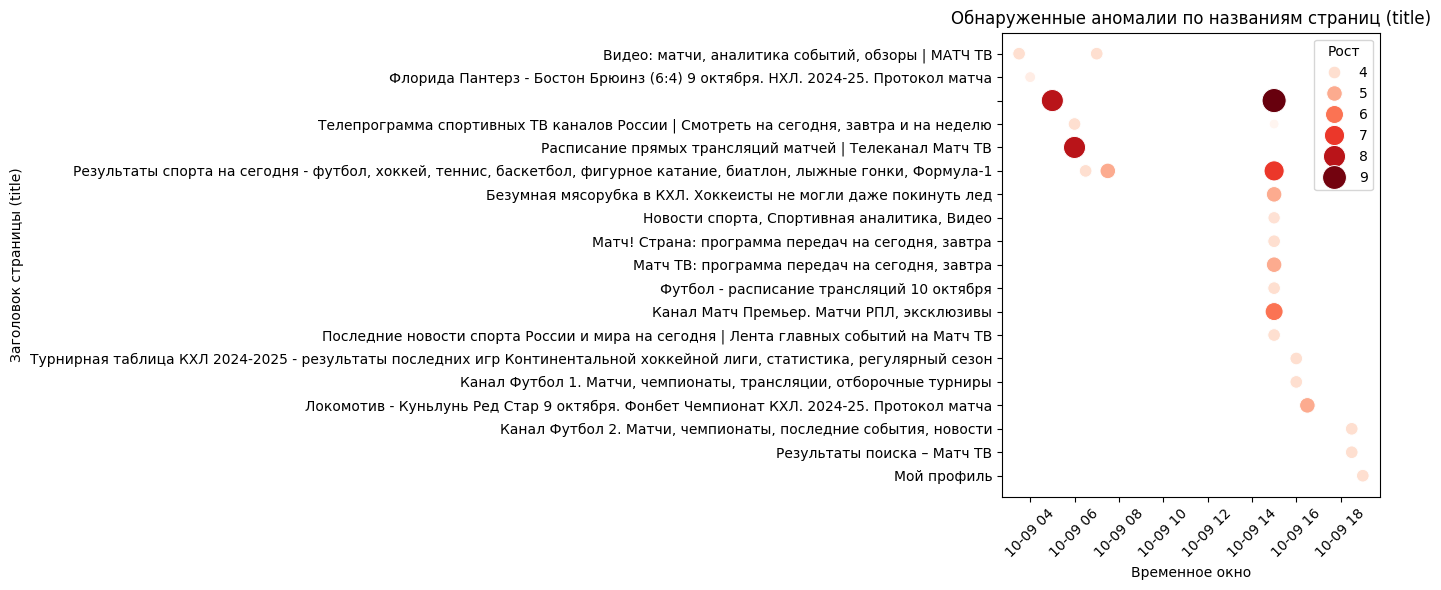

In [14]:
anomalies = detect_anomalous_page_views(df, threshold=3, window_size='30T')
plot_anomalous_page_views(anomalies)


In [11]:
print(df.columns)

Index(['ts', 'ip', 'page_view_order_number', 'event_order_number', 'event',
       'secs', 'url', 'referer', 'randPAS_user_passport_id',
       'randPAS_user_agent_id', 'randPAS_trex_cid', 'randPAS_uma_media_cid',
       'randPAS_session_id', 'is_new_page', 'title', 'node_id',
       'main_rubric_id', 'content_is_longread', 'content_editor_id',
       'content_author_ids', 'is_registration', 'is_fast_login',
       'ua_device_family', 'ua_device_brand', 'ua_device_model',
       'ua_os_family', 'ua_os_version', 'ua_browser_family',
       'ua_browser_version', 'ua_is_mobile', 'ua_is_tablet', 'ua_is_pc',
       'ua_is_bot', 'ua_device_type', 'geo_city_id', 'date'],
      dtype='object')


In [23]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


def detect_anomalous_users(df, return_all=True):
    """
    Обнаруживает аномальных пользователей по времени, проведенному на страницах.

    Параметры:
        df (pd.DataFrame): DataFrame с данными о пользователях и времени их активности.
        return_all (bool): Возвращать ли всех пользователей с флагом аномалии.

    Возвращает:
        pd.DataFrame: DataFrame с колонками ['randPAS_user_passport_id', 'avg_time_spent', 'is_anomalous'].
                      Если return_all=False — только аномальные.
    """
    user_page_times = df.groupby(['randPAS_user_passport_id', 'url'])['ts'] \
                        .apply(lambda x: x.max() - x.min()).reset_index()

    user_avg_times = user_page_times.groupby('randPAS_user_passport_id')['ts'].mean().reset_index()
    user_avg_times.columns = ['randPAS_user_passport_id', 'avg_time_spent']

    model = IsolationForest(contamination=0.03, random_state=42)
    user_avg_times['is_anomalous'] = model.fit_predict(user_avg_times[['avg_time_spent']])

    if return_all:
        return user_avg_times
    else:
        return user_avg_times[user_avg_times['is_anomalous'] == -1]


def plot_anomalous_users(user_df):
    """
    Визуализирует среднее время, проведенное пользователями, с выделением аномалий.

    Параметры:
        user_df (pd.DataFrame): DataFrame с колонками ['randPAS_user_passport_id', 'avg_time_spent', 'is_anomalous'].
    """
    if user_df.empty:
        print("Нет данных для визуализации.")
        return

    user_df = user_df.copy()
    user_df['user_id_str'] = user_df['randPAS_user_passport_id'].astype(str)

    plt.figure(figsize=(14, 6))
    sns.scatterplot(
        data=user_df,
        x='user_id_str',
        y='avg_time_spent',
        hue='is_anomalous',
        palette={1: 'blue', -1: 'red'},
        s=100
    )

    plt.title('Анализ пользователей по среднему времени на странице')
    plt.xlabel('Пользователь')
    plt.ylabel('Среднее время на странице')
    plt.xticks([], [])
    plt.legend(title='Аномалия', labels=['Нормальный', 'Аномалия'])
    plt.tight_layout()
    plt.show()


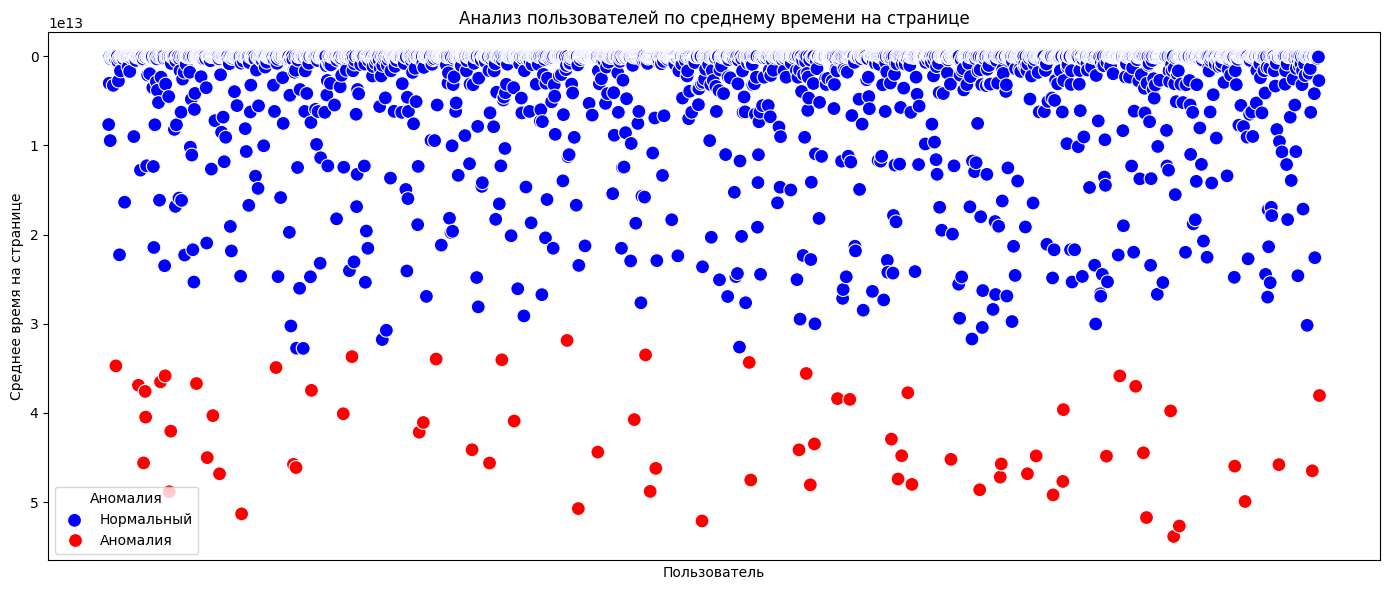

In [24]:
user_stats = detect_anomalous_users(df, return_all=True)
plot_anomalous_users(user_stats)



In [33]:
def detect_anomalous_device_shares(df, threshold=1.5, window_size='30T'):
    """
    Обнаруживает аномальные изменения в доле типов устройств по временным окнам.

    Параметры:
        df (pd.DataFrame): DataFrame с данными об устройствах.
        threshold (float): Порог для обнаружения аномалий.
        window_size (str): Размер временного окна для анализа.

    Возвращает:
        tuple: (DataFrame с аномальными окнами, DataFrame с долями устройств)
    """
    df = df.copy()
    df['ts'] = pd.to_datetime(df['ts'])
    df['time_window'] = df['ts'].dt.floor(window_size)

    def get_device_type(row):
        if row['ua_is_mobile'] in [1, True]:
            return 'Телефон'
        elif row['ua_is_tablet'] in [1, True]:
            return 'Планшет'
        elif row['ua_is_pc'] in [1, True]:
            return 'ПК'
        else:
            return 'Другое'

    df['device_type'] = df.apply(get_device_type, axis=1)

    device_shares = df.groupby(['time_window', 'device_type']).size().unstack().fillna(0)
    device_shares = device_shares.div(device_shares.sum(axis=1), axis=0)

    device_shares_change = device_shares.pct_change().abs().fillna(0)

    anomalous_windows = device_shares_change[device_shares_change.max(axis=1) > threshold]

    return anomalous_windows, device_shares



def plot_device_share_changes(device_shares, anomalous_windows=None):
    """
    Визуализирует изменение долей типов устройств во времени с подсветкой аномалий.

    Параметры:
        device_shares (pd.DataFrame): Доля устройств по временным окнам.
        anomalous_windows (pd.DataFrame или None): Окна, в которых были аномалии.
    """
    plt.figure(figsize=(14, 6))
    device_shares.plot(ax=plt.gca(), marker='o')

    if anomalous_windows is not None and not anomalous_windows.empty:
        for ts in anomalous_windows.index:
            plt.axvline(ts, color='red', linestyle='--', alpha=0.5)

    plt.title('Доля типов устройств во времени')
    plt.xlabel('Временное окно')
    plt.ylabel('Доля')
    plt.legend(title='Тип устройства')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


<ipython-input-33-f5a1ffc0d724>:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df['time_window'] = df['ts'].dt.floor(window_size)


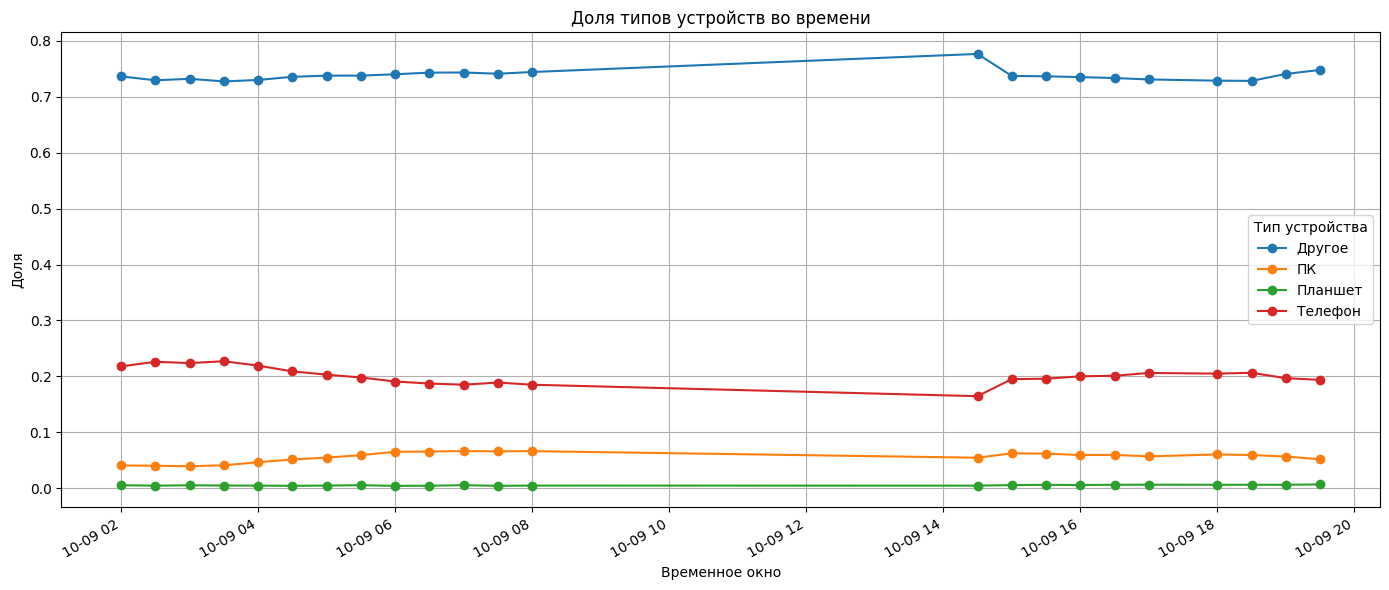

In [34]:
anomalous_windows, device_shares = detect_anomalous_device_shares(df)
plot_device_share_changes(device_shares, anomalous_windows)


In [29]:
print(anomalous_windows, device_shares)

Empty DataFrame
Columns: [Телефон]
Index: [] device_type          Телефон
time_window                 
2024-10-09 02:00:00      1.0
2024-10-09 02:30:00      1.0
2024-10-09 03:00:00      1.0
2024-10-09 03:30:00      1.0
2024-10-09 04:00:00      1.0
2024-10-09 04:30:00      1.0
2024-10-09 05:00:00      1.0
2024-10-09 05:30:00      1.0
2024-10-09 06:00:00      1.0
2024-10-09 06:30:00      1.0
2024-10-09 07:00:00      1.0
2024-10-09 07:30:00      1.0
2024-10-09 08:00:00      1.0
2024-10-09 14:30:00      1.0
2024-10-09 15:00:00      1.0
2024-10-09 15:30:00      1.0
2024-10-09 16:00:00      1.0
2024-10-09 16:30:00      1.0
2024-10-09 17:00:00      1.0
2024-10-09 18:00:00      1.0
2024-10-09 18:30:00      1.0
2024-10-09 19:00:00      1.0
2024-10-09 19:30:00      1.0


In [31]:
def count_device_types(df):
    """
    Считает количество разных типов устройств на основе значений ua_is_mobile / tablet / pc,
    учитывая True или 1.

    Возвращает:
        pd.Series: Количество по типам устройств.
    """
    def get_device_type(row):
        if row['ua_is_mobile'] in [1, True]:
            return 'Телефон'
        elif row['ua_is_tablet'] in [1, True]:
            return 'Планшет'
        elif row['ua_is_pc'] in [1, True]:
            return 'ПК'
        else:
            return 'Другое'

    df = df.copy()
    df['device_type'] = df.apply(get_device_type, axis=1)

    return df['device_type'].value_counts()



device_counts = count_device_types(df)
print(device_counts)


device_type
Другое     3514233
Телефон     965638
ПК          265476
Планшет      24860
Name: count, dtype: int64


<ipython-input-38-fac8e035b2bd>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suspicious_users['ip_count'] = suspicious_users['ip_list'].apply(len)
<ipython-input-38-fac8e035b2bd>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


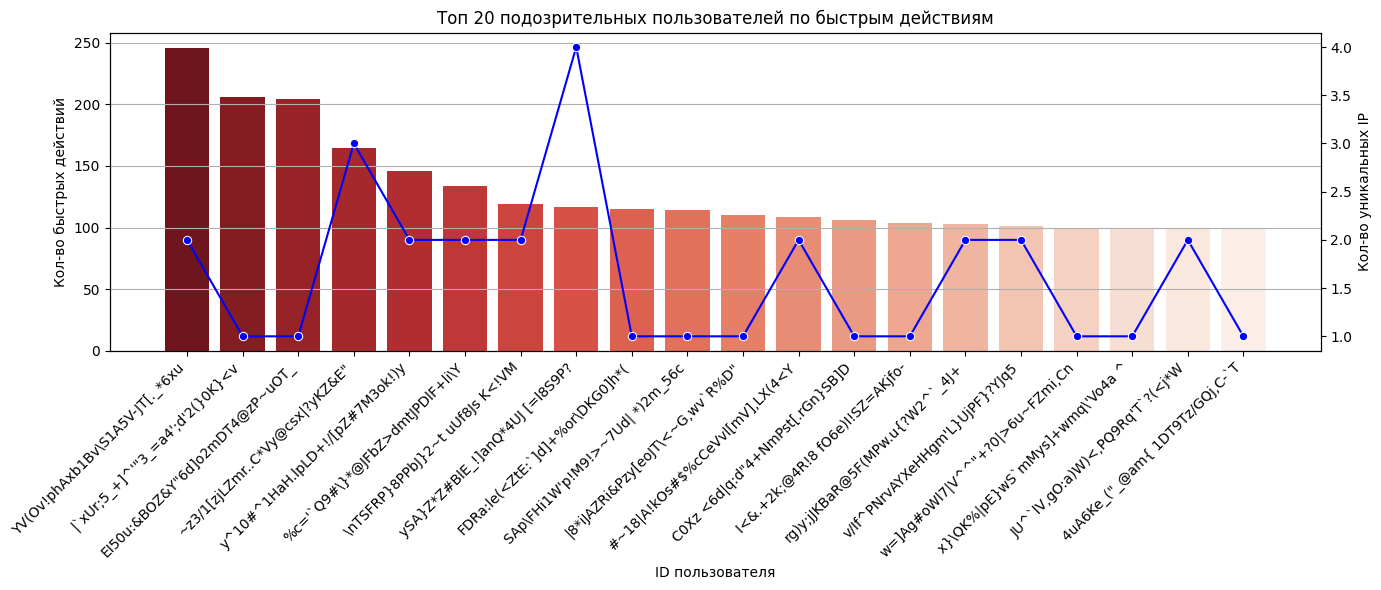

In [38]:
def detect_user_activity_spikes(df: pd.DataFrame,
                                time_window_sec: int = 60,
                                max_actions: int = 30) -> pd.DataFrame:
    """
    Обнаруживает пользователей с аномально высокой активностью

    Параметры:
        df: DataFrame с данными
        time_window_sec: временное окно в секундах для анализа
        max_actions: максимальное допустимое количество действий за окно

    Возвращает:
        DataFrame с подозрительными пользователями и статистикой
    """

    df_sorted = df.sort_values(['randPAS_user_passport_id', 'ts'])
    df_sorted['time_diff'] = (
        df_sorted.groupby('randPAS_user_passport_id')['ts']
        .diff()
        .dt.total_seconds()
    )
    rapid_actions = df_sorted[df_sorted['time_diff'] < time_window_sec] \
        .groupby('randPAS_user_passport_id') \
        .agg(
        rapid_actions_count=('time_diff', 'count'),
        min_time_diff=('time_diff', 'min'),
        avg_time_diff=('time_diff', 'mean'),
        ip_list=('ip', lambda x: x.unique().tolist())
    ) \
        .reset_index()
    suspicious_users = rapid_actions[rapid_actions['rapid_actions_count'] > max_actions]
    suspicious_users['ip_count'] = suspicious_users['ip_list'].apply(len)

    return suspicious_users.sort_values('rapid_actions_count', ascending=False)



import matplotlib.pyplot as plt
import seaborn as sns

def plot_user_activity_spikes(suspicious_users: pd.DataFrame, top_n: int = 20, exclude_top_outlier=True):
    """
    Визуализирует подозрительных пользователей по количеству быстрых действий.

    Параметры:
        suspicious_users: DataFrame, возвращаемый функцией detect_user_activity_spikes
        top_n: сколько пользователей визуализировать
        exclude_top_outlier: исключить ли самого аномального (чтобы не портил график)
    """
    if suspicious_users.empty:
        print("Нет подозрительных пользователей для отображения.")
        return

    df_plot = suspicious_users.copy()

    if exclude_top_outlier and len(df_plot) > 1:
        top_outlier = df_plot.iloc[0]
        second = df_plot.iloc[1]
        if top_outlier['rapid_actions_count'] > second['rapid_actions_count'] * 2:
            df_plot = df_plot.iloc[1:]

    df_plot = df_plot.head(top_n)

    plt.figure(figsize=(14, 6))

    sns.barplot(
        data=df_plot,
        x='randPAS_user_passport_id',
        y='rapid_actions_count',
        palette='Reds_r'
    )

    plt.title(f'Топ {top_n} подозрительных пользователей по быстрым действиям')
    plt.ylabel('Кол-во быстрых действий')
    plt.xlabel('ID пользователя')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')

    ax2 = plt.gca().twinx()
    sns.lineplot(
        data=df_plot,
        x='randPAS_user_passport_id',
        y='ip_count',
        marker='o',
        color='blue',
        ax=ax2
    )
    ax2.set_ylabel('Кол-во уникальных IP')

    plt.tight_layout()
    plt.show()

suspicious_users = detect_user_activity_spikes(df)
plot_user_activity_spikes(suspicious_users)


